# The Battle of Neighborhoods

## 1 Introduction

### 1.1 Description

New York City is the most populous city in the US, which has been described as the cultural, financial, and media capital of the world. Its food culture includes an array of international cuisines influenced by the city's immigrant history. Central and Eastern European immigrants, especially Jewish immigrants from those regions, brought bagels, cheesecake, hot dogs, knishes, and delicatessens (or delis) to the city. Italian immigrants brought New York-style pizza and Italian cuisine into the city, while Jewish immigrants and Irish immigrants brought pastrami and corned beef, respectively. Chinese and other Asian restaurants, sandwich joints, trattorias, diners, and coffeehouses are ubiquitous throughout the city. Some 4,000 mobile food vendors licensed by the city, many immigrant-owned, have made Middle Eastern foods such as falafel and kebabs examples of modern New York street food. The city is home to "nearly one thousand of the finest and most diverse haute cuisine restaurants in the world", according to Michelin. The New York City Department of Health and Mental Hygiene assigns letter grades to the city's restaurants based upon their inspection results. As of 2019, there were 27,043 restaurants in the city, up from 24,865 in 2017.

### 1.2 Problem

As the figures above, New York is a dream place for gourmet to seek delicious cuisine and also a good place for those who want to start their food business. As we all know New York is home to the largest ethnic Chinese population outside of Asia, with multiple distinct Chinatowns across the city. So NYC is a good place for people who want run a **Chinese Restaurant**. Before people take action, they need to know where they open it? By exploring the characteristics of Chinese restaurants, I hope to figure out **whether there is a pattern in the distribution of the restaurants**, so that we can give some advices for those who want to start a new Chinese Restaurant.

## 2. NYC Data Acquisition and Cleaning

Download the dataset via:https://geo.nyu.edu/catalog/nyu_2451_34572

### 2.1 Download NYC Data

In [106]:
import numpy as np
import pandas as pd
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [2]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset

#### Load and explore the data

In [3]:
with open ('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [4]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

#### Cleaning the data and Transform to DataFrame|

In [5]:
nyc_neighborhoods = newyork_data['features']
nyc_neighborhoods[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Transform data into dataframe

In [6]:
# define the dateframe columns
columns_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=columns_names)

# loop through the data and fill the dataframe one row at a time
for data in nyc_neighborhoods:
    borough = data['properties']['borough'] # get the borough 
    neighborhood_name = data['properties']['name'] # get the neighborhood name
    neighborhood_crdnt = data['geometry']['coordinates'] # get the coordinates of the neighborhood
    neighborhood_lat = neighborhood_crdnt[1] # get latitude
    neighborhood_lon = neighborhood_crdnt[0] # get longitude
    
    neighborhoods = neighborhoods.append({'Borough':borough,
                                          'Neighborhood':neighborhood_name,
                                          'Latitude':neighborhood_lat,
                                          'Longitude':neighborhood_lon},ignore_index=True)
    

In [7]:
# show the size of the dataframe
print("Dataframe has{} boroughs and {} neighborhoods.".format(len(neighborhoods['Borough'].unique()),
                                                              neighborhoods.shape[0]))
neighborhoods.head()

Dataframe has5 boroughs and 306 neighborhoods.


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


#### Use geopy library to get the latitude and longitude values of New York City.

In [8]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!pip install folium
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

     |████████████████████████████████| 102kB 7.8MB/s ta 0:00:011


In [9]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [10]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

### 2.2 Using Foursquare API Get Venues Data And Cleaning Data

In [11]:
CLIENT_ID = 'RXN2SPL3YGJ55SZR43HI5TQG0LJX0EH3RTUPDJQFAMZ2SF2W' # your Foursquare ID
CLIENT_SECRET = 'HV3FDSKCEQFWAM4511CYLTJ4ZHH01MXEB3SJRNCD4P4CH2EC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 #radius = 500 

#### Getting Chinese Restaurants datas of each neighborhood and Cleaning data

In [12]:
# this func is used to get Chinese Restaurants categoryids by Foursquare API 
def getCNRestaurantIds():
    
    # create the API request URL
    url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION
    )
    
    # make the GET request
    results = requests.get(url).json()['response']['categories'][3]['categories'][4]['categories'][2]['categories']
    
    # return the id and name
    Restuarant_list=[]
    for style in results:
            Restuarant_list.append([
                style['id'],
                style['name']
               ])
            
    Res_types = pd.DataFrame([item for item in Restuarant_list])
    Res_types.columns = ['id','name']
    
    # add another two categories
    Res_types = Res_types.append({'id':'52af0bd33cf9994f4e043bdd','name':'Hotpot Restaurant'}, ignore_index=True)
    Res_types = Res_types.append({'id':'4bf58dd8d48988d145941735','name':'Chinese Restaurant'}, ignore_index=True)
    
    #cahnge the 
    return Res_types

In [13]:
Res_types = getCNRestaurantIds()
Res_types

,id,name
0,52af3a5e3cf9994f4e043bea,Anhui Restaurant
1,52af3a723cf9994f4e043bec,Beijing Restaurant
2,52af3a7c3cf9994f4e043bed,Cantonese Restaurant
3,58daa1558bbb0b01f18ec1d3,Cha Chaan Teng
4,52af3a673cf9994f4e043beb,Chinese Aristocrat Restaurant
5,52af3a903cf9994f4e043bee,Chinese Breakfast Place
6,4bf58dd8d48988d1f5931735,Dim Sum Restaurant
7,52af3a9f3cf9994f4e043bef,Dongbei Restaurant
8,52af3aaa3cf9994f4e043bf0,Fujian Restaurant
9,52af3ab53cf9994f4e043bf1,Guizhou Restaurant


In [14]:
# convert the dataframe to string
temp = Res_types['id'].to_list()
categoryid=''
for index,id in enumerate(temp):
    if index == 0:
        categoryid+=id
    else:
        categoryid = categoryid+','+id
categoryid

'52af3a5e3cf9994f4e043bea,52af3a723cf9994f4e043bec,52af3a7c3cf9994f4e043bed,58daa1558bbb0b01f18ec1d3,52af3a673cf9994f4e043beb,52af3a903cf9994f4e043bee,4bf58dd8d48988d1f5931735,52af3a9f3cf9994f4e043bef,52af3aaa3cf9994f4e043bf0,52af3ab53cf9994f4e043bf1,52af3abe3cf9994f4e043bf2,52af3ac83cf9994f4e043bf3,52af3ad23cf9994f4e043bf4,52af3add3cf9994f4e043bf5,52af3af23cf9994f4e043bf7,52af3ae63cf9994f4e043bf6,52af3afc3cf9994f4e043bf8,52af3b053cf9994f4e043bf9,52af3b213cf9994f4e043bfa,52af3b293cf9994f4e043bfb,52af3b343cf9994f4e043bfc,52af3b3b3cf9994f4e043bfd,52af3b463cf9994f4e043bfe,52af3b633cf9994f4e043c01,52af3b513cf9994f4e043bff,52af3b593cf9994f4e043c00,52af3b6e3cf9994f4e043c02,52af3b773cf9994f4e043c03,52af3b813cf9994f4e043c04,52af3b893cf9994f4e043c05,52af3b913cf9994f4e043c06,52af3b9a3cf9994f4e043c07,52af3ba23cf9994f4e043c08,52af0bd33cf9994f4e043bdd,4bf58dd8d48988d145941735'

In [15]:
# This func is used to get the Nearby Chinese Restaurants of each neighborhood
def getNearbyVenues(boroughs,names, latitudes, longitudes, radius=500):
    count = 0
    venues_list=[]
    print('Obtaining Restaurants datas: ', end='')
    for borough,name, lat, lng in zip(boroughs,names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            categoryid,
            radius, 
            LIMIT)
        count+=1
        #print("No.{} Done----\n".format(count))
     
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            borough,
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
         
        print(' .', end='')

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough',
                  'Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue Id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    print("-----Done---")
    return(nearby_venues)

In [16]:
# get the venues Info
CN_restaurants = getNearbyVenues(boroughs=neighborhoods['Borough'],
                             names=neighborhoods['Neighborhood'],
                             latitudes=neighborhoods['Latitude'],
                             longitudes=neighborhoods['Longitude']
                                  )

Obtaining Restaurants datas:  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .-----Done---


In [18]:
print(CN_restaurants.shape)
CN_restaurants.head()

(1512, 9)


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bronx,Co-op City,40.874294,-73.829939,4c9d5f2654c8a1cd2e71834b,Guang Hui Chinese Restaurant,40.876651,-73.829092,Chinese Restaurant
1,Bronx,Eastchester,40.887556,-73.827806,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant,40.888785,-73.831226,Chinese Restaurant
2,Bronx,Kingsbridge,40.881687,-73.902818,4e4ddf76bd4101d0d79d3e83,Panda Restaurant,40.880013,-73.904408,Chinese Restaurant
3,Bronx,Kingsbridge,40.881687,-73.902818,4b2285c5f964a520454824e3,Pioneer Chinese Restaurant,40.879541,-73.905327,Chinese Restaurant
4,Bronx,Kingsbridge,40.881687,-73.902818,4e4ddf73bd4101d0d79d3e37,Mei Chung Mei Restaurant,40.878272,-73.902981,Chinese Restaurant


#### Since we set the radius= 500 so there must be some **overlap places**. Let's check if there exists duplicate data and handle it

In [19]:
CN_restaurants['Venue Id'].value_counts()

4ca90db414c33704c276da3b    3
3fd66200f964a52099e61ee3    3
4b8af55ef964a5203e8b32e3    3
564a86c8498ea245a802f0d1    3
4a70e174f964a520acd81fe3    2
585d72449f25836f2b2b7a1b    2
4c6a304e96f176b0e7d2b136    2
4b7e98baf964a52095f42fe3    2
4db8a9470437609120f134d3    2
4b5a5efff964a520b1c028e3    2
5a38681350a6f07d9a886be3    2
4abac118f964a520cb8220e3    2
55f348b7498e60a6896b0144    2
52c6fd9c11d2cad69ccec251    2
5a3019a0a35dce6b06692429    2
5c4a63b11987ec002cddaece    2
5a1eec31a0215b152bfef045    2
5d7d2f62774999000703bdcb    2
3fd66200f964a5206bf11ee3    2
59ad625a2619ee5cdded881f    2
4c352581213c2d7f73c2395d    2
52ed892c498e045e686d6a50    2
4bd4debc4e32d13a9419c080    2
4d9fa1d483f0b1f7ea8c9ec7    2
4af4d994f964a520e1f621e3    2
4bbe0e0407809521db5bdb91    2
5ded51eaf492de00080966ed    2
4e4e4c83bd4101d0d7a725d5    2
4c7ab2ac2d3ba143bb1d92d0    2
3fd66200f964a520b1ea1ee3    2
                           ..
4cb7a76fbac93704197cd67c    1
4bfc11181be376b0f61bf8b4    1
57f5241d49

In [20]:
# we can see there exists duplicate datas, let's clean it
CN_restaurants = CN_restaurants.drop_duplicates(['Venue Id'])
CN_restaurants = CN_restaurants.reset_index(drop=True)
CN_restaurants.shape

(1370, 9)

In [21]:
# Check the Category counts
CN_restaurants['Venue Category'].value_counts()

Chinese Restaurant        1198
Dim Sum Restaurant          38
Hotpot Restaurant           26
Taiwanese Restaurant        24
Szechuan Restaurant         22
Cantonese Restaurant        21
Shanghai Restaurant         20
Cha Chaan Teng               8
Xinjiang Restaurant          3
Dongbei Restaurant           3
Hunan Restaurant             3
Peking Duck Restaurant       1
Street Food Gathering        1
Tanning Salon                1
Doctor's Office              1
Name: Venue Category, dtype: int64

In [24]:
CN_restaurants[CN_restaurants['Venue Category']=="Street Food Gathering"]

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue Id,Venue,Venue Latitude,Venue Longitude,Venue Category
804,Manhattan,Battery Park City,40.711932,-74.016869,5cb9facfa5a315002df25e61,Jianbing Company,40.711868,-74.011089,Street Food Gathering


In [25]:
# drop some erro data
CN_restaurants = CN_restaurants.drop(index=[744,106,804],axis=0)
print(CN_restaurants.shape)
CN_restaurants['Venue Category'].value_counts()

(1367, 9)


Chinese Restaurant        1198
Dim Sum Restaurant          38
Hotpot Restaurant           26
Taiwanese Restaurant        24
Szechuan Restaurant         22
Cantonese Restaurant        21
Shanghai Restaurant         20
Cha Chaan Teng               8
Xinjiang Restaurant          3
Dongbei Restaurant           3
Hunan Restaurant             3
Peking Duck Restaurant       1
Name: Venue Category, dtype: int64

### 2.3 Using Foursquare API gets the detail records of these Chinese Restaurants by  Venue Id and Cleaning Data

Since some restaurants don't have rating, so we had to drop those datas 

In [26]:
# This func is using to get the detail records of each Chinese Restaurant
def getDetailRecords(venue_ids):
    valid =0
    count = 0
    like_missing = 0
    erro = 0
    records = []
    print('Obtaining Restaurants detail datas: ', end='')
    for id in venue_ids:
        # Create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(
            id, 
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
        
        # make the GET request
        try:
            result = requests.get(url).json()['response']['venue']
        except:
                erro +=1
                #print("erro {} data".format(erro))
                continue
        # choosing the useful info
        # Note：Since some records don't have some attributes, we have to handle this exception
        try:
            rating =  result['rating']
        except: 
            # Drop no rating data 
                count += 1
                #print("drop {} data".format(count))
                continue
        try:
            price = result['price']['tier']
        except:
            price = np.nan
        try:
            likes =  result['likes']['count']
        except:
            likes = np.nan
        try:
            photos = result['photos']['count']
        except:
            photos = np.nan
        try:
            tips = result['tips']['count']
        except:
            tips = np.nan
        records.append([
            id,
            result['name'],
            rating,
            price,
            likes,
            photos,
            tips])
        valid += 1
        print(' .', end='')
        #print('Total:{}'.format(total))
        
    detail_recds = pd.DataFrame(item for item in records) 
    detail_recds.columns = ['Venue Id',
                            'Name',
                            'Rating',
                            'Price',
                            'Likes',
                            'Photos',
                            'Tips']
    print("----Finished----")
    print("Valid Data:{}\nDrop Data:{}\nErro Data:{}".format(valid,count,erro))
    return detail_recds


In [27]:
# getting the restaurant detail records
restaurants_details = getDetailRecords(venue_ids = CN_restaurants['Venue Id'])

Obtaining Restaurants detail datas:  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .

In [28]:
# show and store the restaurant detail records
print(restaurants_details.shape)
restaurants_details.head(10)

(515, 7)


,Venue Id,Name,Rating,Price,Likes,Photos,Tips
0,4dabc3dc93a04642f09ccabd,Xing Lung Chinese Restaurant,7.0,1.0,6,0,0
1,4b9d6b45f964a52078ab36e3,Mr. Q's Chinese Restaurant,7.7,1.0,9,11,10
2,4e4d0387bd413c4cc66dfd72,Hung Hing Chinese Restaurant,6.0,1.0,5,1,2
3,4e2e08021838f1c552b6b8eb,Choi Yuan - Chinese Restaurant,6.3,1.0,6,4,8
4,566f33e7498e44c2501bda81,Panda Express,7.6,1.0,12,14,2
5,4bbe0e0407809521db5bdb91,Green Dragon,7.6,2.0,10,16,7
6,4b89b62df964a520ff4c32e3,Sabor Latino Seafood Restaurant,7.0,2.0,5,12,8
7,4c28cca7ed0ac9b6b2c160aa,New China,6.5,1.0,2,3,4
8,4ca4fda4d971b1f77da5f2e0,Golden Phoenix Chinese Restaurant,5.7,1.0,4,1,1
9,4d9a695ee5fd6ea8e3096df5,Lucky House Chinese Restaurant,7.4,1.0,5,0,2


At first, before Cleaning the records data, We should merge the detail records and Restaurants data 

In [29]:
# Merge restaurants_details and CN_restaurants
CN_restaurants_data = pd.merge(restaurants_details,CN_restaurants,how='left',left_on='Venue Id',right_on='Venue Id')

In [30]:
CN_restaurants_data = CN_restaurants_data.drop(['Name'],axis=1)
print(CN_restaurants_data.shape)
CN_restaurants_data.head()

(515, 14)


,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4dabc3dc93a04642f09ccabd,7.0,1.0,6,0,0,Bronx,Eastchester,40.887556,-73.827806,Xing Lung Chinese Restaurant,40.888785,-73.831226,Chinese Restaurant
1,4b9d6b45f964a52078ab36e3,7.7,1.0,9,11,10,Bronx,Pelham Parkway,40.857413,-73.854756,Mr. Q's Chinese Restaurant,40.855790,-73.855455,Chinese Restaurant
2,4e4d0387bd413c4cc66dfd72,6.0,1.0,5,1,2,Bronx,Bedford Park,40.870185,-73.885512,Hung Hing Chinese Restaurant,40.871181,-73.886759,Chinese Restaurant
3,4e2e08021838f1c552b6b8eb,6.3,1.0,6,4,8,Bronx,Bedford Park,40.870185,-73.885512,Choi Yuan - Chinese Restaurant,40.873078,-73.889086,Chinese Restaurant
4,566f33e7498e44c2501bda81,7.6,1.0,12,14,2,Bronx,Fordham,40.860997,-73.896427,Panda Express,40.863001,-73.900894,Chinese Restaurant


Since there some NaN values in column Price, we need to use the mean of the same category to replace these values

In [31]:
# Calculate the mean price  of each catagory
means = CN_restaurants_data.groupby('Venue Category').mean()
means.T

Venue Category,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Dim Sum Restaurant,Hotpot Restaurant,Hunan Restaurant,Peking Duck Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant
Rating,6.872727,7.160000,6.823961,7.057692,7.400000,6.800000,8.200000,7.238462,7.162500,7.533333
Price,3.000000,1.000000,1.292383,1.961538,1.833333,NaN,2.000000,1.500000,2.200000,1.444444
Likes,35.545455,77.000000,64.750611,168.692308,96.166667,14.000000,326.000000,106.615385,38.812500,88.466667
Photos,61.909091,160.400000,72.885086,227.192308,106.611111,10.000000,452.000000,112.307692,35.562500,89.133333
Tips,8.454545,38.600000,27.931540,51.692308,20.666667,2.000000,92.000000,35.615385,12.625000,26.400000
Neighborhood Latitude,40.716207,40.715618,40.733196,40.715060,40.730056,40.797307,40.715618,40.726620,40.752514,40.728140
Neighborhood Longitude,-73.958071,-73.994279,-73.960460,-73.970775,-73.933237,-73.964286,-73.994279,-73.947162,-73.964234,-73.937610
Venue Latitude,40.715003,40.715348,40.733088,40.714613,40.729842,40.801491,40.714589,40.725625,40.753116,40.727512
Venue Longitude,-73.957356,-73.995303,-73.960776,-73.971368,-73.933382,-73.965002,-73.998836,-73.947241,-73.965964,-73.939741


We round off mean price of each category to replace the NaN

In [32]:
# 1.handle Cantonese Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Cantonese Restaurant') & (CN_restaurants_data['Price'].isnull()),'Price'] = round(means.loc['Cantonese Restaurant','Price'])
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Cantonese Restaurant')] 


,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
42,554d4e2f498ef7cacc3f475a,6.5,3.0,15,32,1,Brooklyn,Bath Beach,40.599519,-73.998752,Golden Bay Restaurant,40.602534,-73.995032,Cantonese Restaurant
90,56a96c6f498e5f93f0a505fd,8.7,3.0,144,240,27,Manhattan,Chinatown,40.715618,-73.994279,Wu's Wonton King,40.713992,-73.990169,Cantonese Restaurant
94,547622dd498eaea3be8a559f,7.5,3.0,63,77,12,Manhattan,Chinatown,40.715618,-73.994279,Kings Kitchen 金煌煲煲好,40.713852,-73.993640,Cantonese Restaurant
124,5d7d2f62774999000703bdcb,7.8,3.0,29,54,5,Manhattan,Chinatown,40.715618,-73.994279,Yin Ji Chang Fen 銀記腸粉店,40.715759,-73.999259,Cantonese Restaurant
295,54bd6636498e991be4242dc3,7.7,3.0,48,119,16,Manhattan,Little Italy,40.719324,-73.997305,August Gatherings,40.718784,-74.001058,Cantonese Restaurant
304,5888cfef297c166c81a8a04b,6.1,3.0,6,7,0,Manhattan,Little Italy,40.719324,-73.997305,Ming Kee Kitchen Inc,40.718365,-73.994597,Cantonese Restaurant
307,57e40ce3498e7aa078dec848,5.9,3.0,4,11,1,Manhattan,Little Italy,40.719324,-73.997305,New Hong Wong Seafood Restaurant,40.717794,-73.995486,Cantonese Restaurant
308,54c541f9498ec906454a7411,6.1,3.0,19,25,14,Manhattan,Little Italy,40.719324,-73.997305,Canton Lounge,40.716317,-73.998029,Cantonese Restaurant
316,552c4749498e09fa64c59b19,5.8,3.0,15,48,6,Manhattan,Little Italy,40.719324,-73.997305,Bite of Hong Kong,40.717392,-73.994421,Cantonese Restaurant
398,57923f47498ebdaab753557b,6.8,3.0,38,46,8,Queens,Flushing,40.764454,-73.831773,Congee Village,40.760885,-73.832945,Cantonese Restaurant


In [33]:
# 2.handle Cha Chaan Teng
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Cha Chaan Teng') & (CN_restaurants_data['Price'].isnull()),'Price'] = round(means.loc['Cha Chaan Teng','Price'])
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Cha Chaan Teng')] 


,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
93,4d1f817c16cfb60cb1bd5161,7.6,1.0,34,33,20,Manhattan,Chinatown,40.715618,-73.994279,S.Wan Cafe 洋紫荊咖啡室,40.717269,-73.992412,Cha Chaan Teng
99,5b5a01fe4c30be0024864594,7.9,1.0,26,23,3,Manhattan,Chinatown,40.715618,-73.994279,Kong Sihk Tong 港食堂,40.715480,-73.998109,Cha Chaan Teng
147,4a6fa0c2f964a520a5d61fe3,6.9,1.0,24,27,15,Manhattan,Chinatown,40.715618,-73.994279,Ming's Caffe,40.714498,-73.990443,Cha Chaan Teng
152,4aedda39f964a52089cf21e3,6.6,1.0,73,152,38,Manhattan,Chinatown,40.715618,-73.994279,M Star Cafe 明星茶餐廳,40.714200,-73.996594,Cha Chaan Teng
159,4cd37295baf2f04dfc22afa3,6.8,1.0,228,567,117,Manhattan,Chinatown,40.715618,-73.994279,Cha Chan Tang 茶餐廳 (Cha Chan Tang),40.715294,-73.998959,Cha Chaan Teng


In [34]:
# 3.handle Chinese Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Chinese Restaurant') & (CN_restaurants_data['Price'].isnull()),'Price'] = round(means.loc['Chinese Restaurant','Price'])
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Chinese Restaurant')]


,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,4dabc3dc93a04642f09ccabd,7.0,1.0,6,0,0,Bronx,Eastchester,40.887556,-73.827806,Xing Lung Chinese Restaurant,40.888785,-73.831226,Chinese Restaurant
1,4b9d6b45f964a52078ab36e3,7.7,1.0,9,11,10,Bronx,Pelham Parkway,40.857413,-73.854756,Mr. Q's Chinese Restaurant,40.855790,-73.855455,Chinese Restaurant
2,4e4d0387bd413c4cc66dfd72,6.0,1.0,5,1,2,Bronx,Bedford Park,40.870185,-73.885512,Hung Hing Chinese Restaurant,40.871181,-73.886759,Chinese Restaurant
3,4e2e08021838f1c552b6b8eb,6.3,1.0,6,4,8,Bronx,Bedford Park,40.870185,-73.885512,Choi Yuan - Chinese Restaurant,40.873078,-73.889086,Chinese Restaurant
4,566f33e7498e44c2501bda81,7.6,1.0,12,14,2,Bronx,Fordham,40.860997,-73.896427,Panda Express,40.863001,-73.900894,Chinese Restaurant
5,4bbe0e0407809521db5bdb91,7.6,2.0,10,16,7,Bronx,Throgs Neck,40.815109,-73.816350,Green Dragon,40.818878,-73.816793,Chinese Restaurant
6,4b89b62df964a520ff4c32e3,7.0,2.0,5,12,8,Bronx,Parkchester,40.837938,-73.856003,Sabor Latino Seafood Restaurant,40.836366,-73.853034,Chinese Restaurant
7,4c28cca7ed0ac9b6b2c160aa,6.5,1.0,2,3,4,Bronx,North Riverdale,40.908543,-73.904531,New China,40.905181,-73.901078,Chinese Restaurant
8,4ca4fda4d971b1f77da5f2e0,5.7,1.0,4,1,1,Bronx,North Riverdale,40.908543,-73.904531,Golden Phoenix Chinese Restaurant,40.905689,-73.904298,Chinese Restaurant
9,4d9a695ee5fd6ea8e3096df5,7.4,1.0,5,0,2,Bronx,Concourse,40.834284,-73.915589,Lucky House Chinese Restaurant,40.833933,-73.916674,Chinese Restaurant


In [35]:
# 4.handle Dim Sum Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Dim Sum Restaurant') & (CN_restaurants_data['Price'].isnull())] 
# Since there is no NaN, we jump this category

,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [36]:
# 5.handle Hotpot Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Hotpot Restaurant') & (CN_restaurants_data['Price'].isnull()),'Price'] = round(means.loc['Hotpot Restaurant','Price'])
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Hotpot Restaurant')]


,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
15,52c4acf011d212c5797c2305,6.2,2.0,12,43,6,Brooklyn,Bensonhurst,40.611009,-73.995180,18 Hipot,40.609241,-74.000207,Hotpot Restaurant
75,5d992946dbf3ca0008d05211,8.3,2.0,16,26,1,Manhattan,Chinatown,40.715618,-73.994279,Da Yu Hot Pot 大渝火锅,40.716735,-73.995752,Hotpot Restaurant
76,57a29225498e96334ebe06d9,8.4,2.0,103,58,14,Manhattan,Chinatown,40.715618,-73.994279,"Happy Lamb Hot Pot, Manhattan",40.717639,-73.995187,Hotpot Restaurant
83,4bf1ae60324cc9b6b652cc92,7.7,2.0,165,181,54,Manhattan,Chinatown,40.715618,-73.994279,Hou Yi Hot Pot,40.716374,-73.992509,Hotpot Restaurant
85,530ff20411d2a01b7bb8a19c,7.9,2.0,466,412,102,Manhattan,Chinatown,40.715618,-73.994279,99 Favor Taste 99號餐廳,40.717560,-73.992580,Hotpot Restaurant
119,564a86c8498ea245a802f0d1,8.3,2.0,302,301,49,Manhattan,Chinatown,40.715618,-73.994279,Hometown Hotpot & BBQ,40.719247,-73.996918,Hotpot Restaurant
151,59a6087fe96d0c47fbbbda67,6.8,2.0,42,55,6,Manhattan,Chinatown,40.715618,-73.994279,Tang Hotpot,40.718716,-73.994693,Hotpot Restaurant
302,5b89cdeb3c858d002cec42e9,6.4,2.0,29,28,5,Manhattan,Little Italy,40.719324,-73.997305,Zhen Wei Fang,40.721273,-73.993619,Hotpot Restaurant
368,57409a09498ef558cb4db479,7.3,2.0,30,51,9,Queens,Elmhurst,40.744049,-73.881656,iCook Hotpot,40.743192,-73.883348,Hotpot Restaurant
381,4f8379737716785a1637c2e3,8.4,2.0,229,345,50,Queens,Flushing,40.764454,-73.831773,"Happy Lamb Hot Pot, Flushing",40.762083,-73.828963,Hotpot Restaurant


In [37]:
# 6.handle Hunan Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Hunan Restaurant')]

,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
334,5671c7b4498ea75bbb30376c,6.8,NaN,14,10,2,Manhattan,Manhattan Valley,40.797307,-73.964286,Happy Hot Hunan,40.801491,-73.965002,Hunan Restaurant


Since Hunan Restaurant just has one item, we have to drop this data

In [38]:
# drop the Hunan Restaurant data
del_index = CN_restaurants_data[CN_restaurants_data['Venue Category']=='Hunan Restaurant'].index
CN_restaurants_data = CN_restaurants_data.drop(index=del_index,axis=0).reset_index(drop= True)
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Hunan Restaurant')]

,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [39]:
# 7.handle Peking Duck Restaurant 
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Peking Duck Restaurant') & (CN_restaurants_data['Price'].isnull())]

,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


Since there is no NaN, we jump this category

In [40]:
# 8.handle Shanghai Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Shanghai Restaurant') & (CN_restaurants_data['Price'].isnull()),'Price'] = round(means.loc['Shanghai Restaurant','Price'])
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Shanghai Restaurant')]


,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
19,56548eb9498e779f384d892e,6.5,2.0,38,10,9,Brooklyn,Greenpoint,40.730201,-73.954241,m greenpoint,40.726268,-73.952203,Shanghai Restaurant
49,56197f79498e42093938460a,7.2,2.0,222,160,69,Brooklyn,Downtown,40.690844,-73.983463,Yaso Tangbao,40.691733,-73.986454,Shanghai Restaurant
50,5946c1bb3ba76704b8a8cdb6,7.0,2.0,32,25,3,Brooklyn,Downtown,40.690844,-73.983463,Jianbing Company,40.691270,-73.982576,Shanghai Restaurant
86,5ded51eaf492de00080966ed,7.6,2.0,19,23,7,Manhattan,Chinatown,40.715618,-73.994279,Joe's Shanghai 鹿嗚春,40.715661,-73.996693,Shanghai Restaurant
91,4bcf9774a8b3a5939497625f,8.9,2.0,744,663,263,Manhattan,Chinatown,40.715618,-73.994279,Shanghai 21,40.714423,-73.998904,Shanghai Restaurant
101,4abac118f964a520cb8220e3,7.6,1.0,95,176,43,Manhattan,Chinatown,40.715618,-73.994279,Shanghai Asian Cuisine • 上海小館,40.715918,-73.997311,Shanghai Restaurant
137,540e547e498e51456fa10db9,6.9,2.0,49,45,16,Manhattan,Chinatown,40.715618,-73.994279,21 Shanghai House,40.714226,-73.996436,Shanghai Restaurant
139,52ed892c498e045e686d6a50,7.2,2.0,31,37,11,Manhattan,Chinatown,40.715618,-73.994279,Yeah Shanghai Deluxe,40.715618,-73.998462,Shanghai Restaurant
239,592865d1286fda44e1f357f7,8.1,2.0,101,77,21,Manhattan,Murray Hill,40.748303,-73.978332,Little Alley,40.747326,-73.977016,Shanghai Restaurant
249,5a3019a0a35dce6b06692429,5.1,1.0,17,50,6,Manhattan,Murray Hill,40.748303,-73.978332,Yaso Tangbao,40.749951,-73.973037,Shanghai Restaurant


In [41]:
# 9.handle Szechuan Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Szechuan Restaurant') & (CN_restaurants_data['Price'].isnull()),'Price'] = round(means.loc['Szechuan Restaurant','Price'])
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Szechuan Restaurant')]

,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
17,5b809669b9a5a8002c0c871b,8.7,2.0,10,4,4,Brooklyn,Greenpoint,40.730201,-73.954241,Chiko,40.731871,-73.954369,Szechuan Restaurant
106,53a76f8b498e34ef9a638548,7.4,2.0,27,35,12,Manhattan,Chinatown,40.715618,-73.994279,Flaming Kitchen 蜀客,40.717381,-73.995371,Szechuan Restaurant
195,59d807c8d48ec15e78a017f9,5.5,2.0,6,12,8,Manhattan,Yorkville,40.775930,-73.947118,China Jade Szechuan Chili House,40.777304,-73.952187,Szechuan Restaurant
199,50318dc4e4b0e2ee610033e1,6.8,3.0,11,15,4,Manhattan,Lenox Hill,40.768113,-73.958860,Szechuan Gourmet,40.769285,-73.958084,Szechuan Restaurant
222,5a7e4674da2e00425ee2921d,9.0,2.0,145,94,24,Manhattan,Midtown,40.754691,-73.981669,Málà Project,40.756850,-73.980855,Szechuan Restaurant
231,54db9021498ee7bd148d3d06,6.6,2.0,33,52,10,Manhattan,Midtown,40.754691,-73.981669,Savour Sichuan,40.753158,-73.986060,Szechuan Restaurant
233,56e067e2498ee4f64c6605b3,5.9,2.0,27,41,12,Manhattan,Midtown,40.754691,-73.981669,Zest Szechuan,40.752658,-73.984686,Szechuan Restaurant
272,5c4a63b11987ec002cddaece,8.7,2.0,51,38,11,Manhattan,East Village,40.727847,-73.982226,Spicy Moon,40.726754,-73.987095,Szechuan Restaurant
281,57e1c7eb498eea6013b0e451,6.2,2.0,16,9,5,Manhattan,East Village,40.727847,-73.982226,Hot Pot Central,40.731041,-73.985879,Szechuan Restaurant
312,53de8241498e5e65f14a2fbb,6.4,2.0,34,55,15,Manhattan,Little Italy,40.719324,-73.997305,Sichuan Hot Pot,40.714998,-73.998670,Szechuan Restaurant


In [42]:
# 10.handle Taiwanese Restaurant
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Taiwanese Restaurant') & (CN_restaurants_data['Price'].isnull()),'Price'] = round(means.loc['Taiwanese Restaurant','Price'])
CN_restaurants_data.loc[(CN_restaurants_data['Venue Category']=='Taiwanese Restaurant')]


,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
57,5685f10238fa7274dab2566c,9.1,2.0,436,262,101,Brooklyn,East Williamsburg,40.708492,-73.938858,Win Son,40.707430,-73.943359,Taiwanese Restaurant
58,5d62af746d30980007d08784,9.1,1.0,115,111,25,Brooklyn,East Williamsburg,40.708492,-73.938858,Win Son Bakery,40.707226,-73.942985,Taiwanese Restaurant
77,4b2ebc57f964a520e3e524e3,8.4,1.0,137,89,62,Manhattan,Chinatown,40.715618,-73.994279,Teado,40.717184,-73.994883,Taiwanese Restaurant
82,49f61fe9f964a520046c1fe3,8.4,1.0,226,329,84,Manhattan,Chinatown,40.715618,-73.994279,Taiwan Pork Chop House 臺灣武昌好味道,40.714368,-73.997869,Taiwanese Restaurant
116,556a0923498eb674bc49512c,7.6,2.0,84,70,16,Manhattan,Chinatown,40.715618,-73.994279,Taiwan Bear House,40.714724,-73.997730,Taiwanese Restaurant
157,524f436611d257e5c4b67258,6.5,1.0,34,18,5,Manhattan,Chinatown,40.715618,-73.994279,Coco Fresh Tea & Juice,40.714179,-73.993810,Taiwanese Restaurant
267,5a06749bd3cce816fb29ce65,8.7,1.0,122,146,30,Manhattan,East Village,40.727847,-73.982226,Ho Foods,40.726521,-73.984662,Taiwanese Restaurant
273,5b6f0e8864c8e1002c561b14,7.1,1.0,25,26,3,Manhattan,East Village,40.727847,-73.982226,The Braised Shop 台灣正港滷味店,40.729089,-73.984900,Taiwanese Restaurant
284,5bdb553ddd70c5002ca4f59f,5.5,1.0,3,14,1,Manhattan,East Village,40.727847,-73.982226,Nightmarket,40.727319,-73.985220,Taiwanese Restaurant
338,4fb2522de4b0e1e9691c301b,6.9,1.0,68,88,17,Manhattan,Gramercy,40.737210,-73.981376,Bao Bao Cafe 咱家小馆,40.740949,-73.983694,Taiwanese Restaurant


#### Check Restautants data

In [43]:
# Check the category counts
CN_restaurants_data['Venue Category'].value_counts()

Chinese Restaurant        409
Dim Sum Restaurant         26
Hotpot Restaurant          18
Szechuan Restaurant        16
Taiwanese Restaurant       15
Shanghai Restaurant        13
Cantonese Restaurant       11
Cha Chaan Teng              5
Peking Duck Restaurant      1
Name: Venue Category, dtype: int64

In [44]:
# Check the price 
CN_restaurants_data['Price'].value_counts()

1.0    326
2.0    161
3.0     26
4.0      1
Name: Price, dtype: int64

In [45]:
CN_restaurants_data.shape

(514, 14)

In [46]:
# Store the data
CN_restaurants_data.to_excel('CN_restaurants_data_cleaned.xls')
CN_restaurants_data.to_csv("CN_restaurants_data_cleaned.csv",index=False,sep=',')

## 3. Explore and Analyze  Chinese Restuarants Data

In [51]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans
from folium.plugins import HeatMap
%matplotlib inline 

### 3.1 Using HeatMap to see the Density of Chinese Restuarants

In [109]:
distribution = CN_restaurants_data.groupby(by='Neighborhood').count()
distribution = distribution[['Venue']].reset_index()
distribution = pd.merge(distribution,neighborhoods,how='left',left_on='Neighborhood',right_on='Neighborhood')

In [110]:
distribution.head()

,Neighborhood,Venue,Borough,Latitude,Longitude
0,Allerton,1,Bronx,40.865788,-73.859319
1,Astoria,3,Queens,40.768509,-73.915654
2,Bath Beach,4,Brooklyn,40.599519,-73.998752
3,Battery Park City,6,Manhattan,40.711932,-74.016869
4,Bay Ridge,4,Brooklyn,40.625801,-74.030621


In [111]:
# set the place with no Chinese restaurants to 0
distribution.loc[distribution['Venue'].isnull(),'Venue'] = 0
distribution

,Neighborhood,Venue,Borough,Latitude,Longitude
0,Allerton,1,Bronx,40.865788,-73.859319
1,Astoria,3,Queens,40.768509,-73.915654
2,Bath Beach,4,Brooklyn,40.599519,-73.998752
3,Battery Park City,6,Manhattan,40.711932,-74.016869
4,Bay Ridge,4,Brooklyn,40.625801,-74.030621
5,Bayside,2,Queens,40.766041,-73.774274
6,Bedford Park,2,Bronx,40.870185,-73.885512
7,Bellaire,2,Queens,40.733014,-73.738892
8,Bensonhurst,2,Brooklyn,40.611009,-73.995180
9,Boerum Hill,1,Brooklyn,40.685683,-73.983748


In [112]:
# del the redundant value
distribution = distribution.drop_duplicates(['Neighborhood'])
distribution = distribution.reset_index(drop=True)
distribution.rename(columns={'Venue':'Counts'},inplace=True)
distribution.head(50)

,Neighborhood,Counts,Borough,Latitude,Longitude
0,Allerton,1,Bronx,40.865788,-73.859319
1,Astoria,3,Queens,40.768509,-73.915654
2,Bath Beach,4,Brooklyn,40.599519,-73.998752
3,Battery Park City,6,Manhattan,40.711932,-74.016869
4,Bay Ridge,4,Brooklyn,40.625801,-74.030621
5,Bayside,2,Queens,40.766041,-73.774274
6,Bedford Park,2,Bronx,40.870185,-73.885512
7,Bellaire,2,Queens,40.733014,-73.738892
8,Bensonhurst,2,Brooklyn,40.611009,-73.995180
9,Boerum Hill,1,Brooklyn,40.685683,-73.983748


In [113]:
# prepare the HeatMap Data
lats = [lat for lat in distribution['Latitude']]
logs = [log for log in distribution['Longitude']]
counts = [count for count in distribution['Counts']]
data1 = [[lats[i],logs[i],counts[i]] for i in range(len(distribution))]

In [114]:
map_nyc_heat = folium.Map(location=[latitude, longitude], zoom_start=13)
folium.TileLayer('cartodbpositron').add_to(map_nyc_heat) #cartodbpositron cartodbdark_matter
HeatMap(data1).add_to(map_nyc_heat)
'''
# add markers to map
for lat, lng, nei,count,borough in zip(distribution['Latitude'], distribution['Longitude'],
                                 distribution['Neighborhood'],distribution['Counts'],distribution['Borough']):
    
    label = folium.Popup('B:'+borough+" "+"Nei:"+nei+'='+str(count), parse_html=True)
    folium.Marker(
        location=[lat, lng],
        popup=label,
        icon=folium.Icon(color='blue')
       ).add_to(map_nyc_heat)  
'''
map_nyc_heat

From the Heatmap, we can see that most of restaurants are concentrated in Manhattan

### 3.2 Using One-hot encoding to code Restaurant Category

In [118]:
# one-hot encoding
CN_restaurants_onehot = pd.get_dummies(CN_restaurants_data[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
CN_restaurants_onehot[['Neighborhood',
                       'Venue Id',
                       'Rating',
                       'Price',
                       'Likes',
                       'Photos',
                       'Tips'
                      ]] = CN_restaurants_data[['Neighborhood',
                       'Venue Id',
                       'Rating',
                       'Price',
                       'Likes',
                       'Photos',
                       'Tips']]


CN_restaurants_onehot.head()

,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Dim Sum Restaurant,Hotpot Restaurant,Peking Duck Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Neighborhood,Venue Id,Rating,Price,Likes,Photos,Tips
0,0,0,1,0,0,0,0,0,0,Eastchester,4dabc3dc93a04642f09ccabd,7.0,1.0,6,0,0
1,0,0,1,0,0,0,0,0,0,Pelham Parkway,4b9d6b45f964a52078ab36e3,7.7,1.0,9,11,10
2,0,0,1,0,0,0,0,0,0,Bedford Park,4e4d0387bd413c4cc66dfd72,6.0,1.0,5,1,2
3,0,0,1,0,0,0,0,0,0,Bedford Park,4e2e08021838f1c552b6b8eb,6.3,1.0,6,4,8
4,0,0,1,0,0,0,0,0,0,Fordham,566f33e7498e44c2501bda81,7.6,1.0,12,14,2


In [119]:
CN_restaurants_onehot.shape

(514, 16)

In [122]:
CN_restaurants_grouped = CN_restaurants_onehot[['Neighborhood','Cantonese Restaurant','Cha Chaan Teng','Chinese Restaurant','Dim Sum Restaurant',
                                               'Hotpot Restaurant','Peking Duck Restaurant','Shanghai Restaurant','Szechuan Restaurant',
                                                'Taiwanese Restaurant']].groupby('Neighborhood').sum().reset_index()
#.groupby('Neighborhood').sum().reset_index()
CN_restaurants_grouped.head()

,Neighborhood,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Dim Sum Restaurant,Hotpot Restaurant,Peking Duck Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant
0,Allerton,0,0,1,0,0,0,0,0,0
1,Astoria,0,0,3,0,0,0,0,0,0
2,Bath Beach,1,0,2,1,0,0,0,0,0
3,Battery Park City,0,0,5,1,0,0,0,0,0
4,Bay Ridge,0,0,3,1,0,0,0,0,0


### 3.3 Let's see the **correlation coefficient** of **Rating,Pric,Likes,Photos,Tips**

In [121]:
CN_restaurants_onehot[['Rating','Price','Likes','Photos','Tips']].corr()


,Rating,Price,Likes,Photos,Tips
Rating,1.000000,0.137413,0.462308,0.401613,0.413512
Price,0.137413,1.000000,0.218063,0.255197,0.200156
Likes,0.462308,0.218063,1.000000,0.922552,0.960418
Photos,0.401613,0.255197,0.922552,1.000000,0.917763
Tips,0.413512,0.200156,0.960418,0.917763,1.000000


From the correlation coefficient Matrix, we can see **Likes,Photos,Tips** have a strong relation. So this means they are redundant features, we can just select one. But **Likes, Photos, Tips** are not highly related to **Rating**. We can explain this in two ways, in the one hand, **Rating** can be a feature, in another hand, Customers who click Likes for some specific reasons but give lower ratings to the general performance might cause this low correlation.
And **Rating** has a weak relation with **Price**, which means that the price might not affect impressions of customers in that place significantly and **Price** is a good feature.

### 3.4  Using Horizontal Bar Plot to Visualize the distribution of Chinese Restuarants

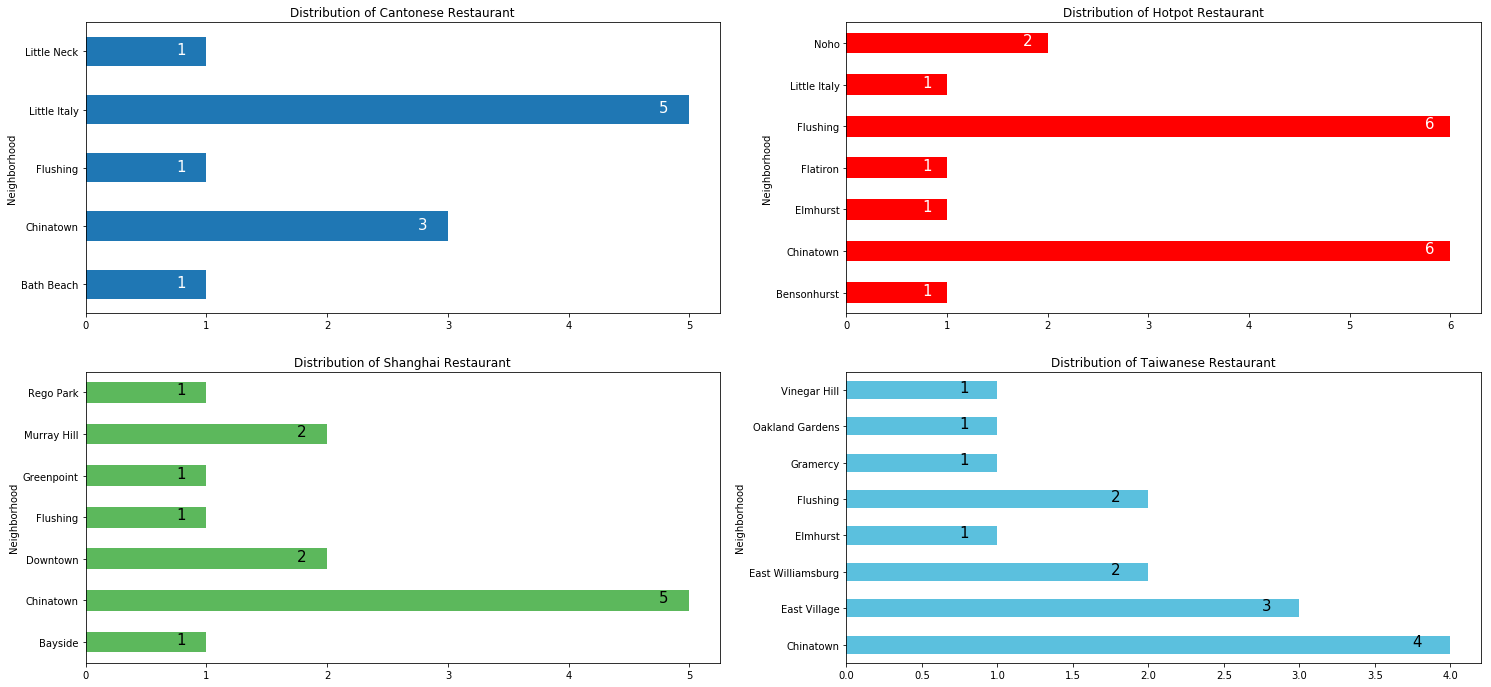

In [123]:
# Plot 
fig = plt.figure() # create figure
ax0 = fig.add_subplot(3, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(3, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
ax2 = fig.add_subplot(3, 2, 3) # add subplot 3 (1 row, 2 columns, third plot)
ax3 = fig.add_subplot(3, 2, 4) # add subplot 4 (1 row, 2 columns, fourth plot)
#ax4 = fig.add_subplot(3, 1, 3) # add subplot 5 (1 row, 2 columns, fifth plot)
# Subplot 1: Cantonese Restaurants
data1 = CN_restaurants_grouped[CN_restaurants_grouped['Cantonese Restaurant'] > 0][['Neighborhood','Cantonese Restaurant']]
data1.set_index('Neighborhood',inplace=True)
data1.plot(kind='barh', figsize=(25,10),legend=False,ax=ax0)# add to subplot 1
ax0.set_title('Distribution of Cantonese Restaurant')
#add percentage
for i in ax0.patches:
    y=i.get_y()
    width=i.get_width()
    label = "{}".format(width)
    ax0.annotate(label, xy=(width-0.25,y+0.2), color='white',fontsize=15)

# Subplot 2: Hotpot Restaurants
data2 = CN_restaurants_grouped[CN_restaurants_grouped['Hotpot Restaurant'] > 0][['Neighborhood','Hotpot Restaurant']]
data2.set_index('Neighborhood',inplace=True)
data2.plot(kind='barh', figsize=(25,10),legend=False,color='red',ax=ax1)# add to subplot 1
ax1.set_title('Distribution of Hotpot Restaurant')
#add percentage
for i in ax1.patches:
    y=i.get_y()
    width=i.get_width()
    label = "{}".format(width)
    ax1.annotate(label, xy=(width-0.25,y+0.2), color='white',fontsize=15)
    
# Subplot 3: Shanghai Restaurants
data3 = CN_restaurants_grouped[CN_restaurants_grouped['Shanghai Restaurant'] > 0][['Neighborhood','Shanghai Restaurant']]
data3.set_index('Neighborhood',inplace=True)
data3.plot(kind='barh', figsize=(25,10),legend=False,color='#5cb85c',ax=ax2)# add to subplot 1
ax2.set_title('Distribution of Shanghai Restaurant')
#add percentage
for i in ax2.patches:
    y=i.get_y()
    width=i.get_width()
    label = "{}".format(width)
    ax2.annotate(label, xy=(width-0.25,y+0.2), color='black',fontsize=15)
    
# Subplot 4: Taiwanese Restaurants
data4 = CN_restaurants_grouped[CN_restaurants_grouped['Taiwanese Restaurant'] > 0][['Neighborhood','Taiwanese Restaurant']]
data4.set_index('Neighborhood',inplace=True)
data4.plot(kind='barh', figsize=(25,10),legend=False,color='#5bc0de',ax=ax3)# add to subplot 1
ax3.set_title('Distribution of Taiwanese Restaurant')
#add percentage
for i in ax3.patches:
    y=i.get_y()
    width=i.get_width()
    label = "{}".format(width)
    ax3.annotate(label, xy=(width-0.25,y+0.2), color='black',fontsize=15)  

    
plt.subplots_adjust(left=None, bottom=None, right=None, top=1.5, wspace=None, hspace=None)   
plt.show()

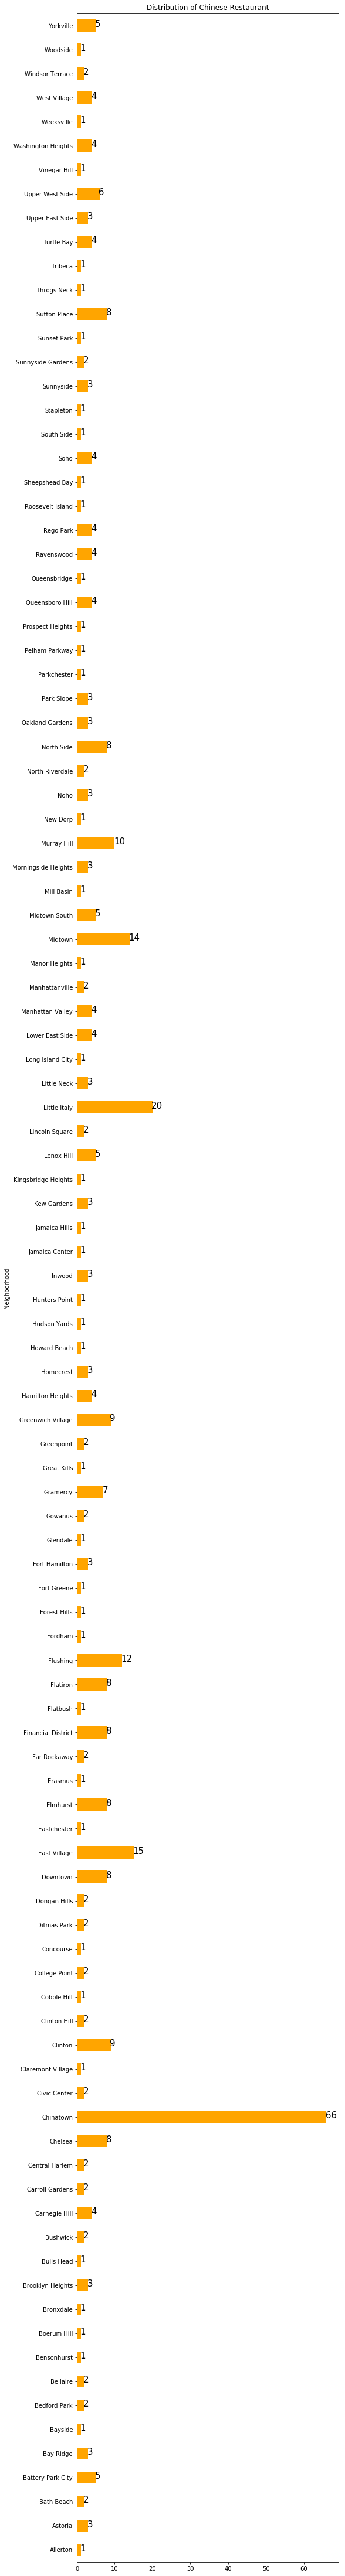

In [124]:
data5 = CN_restaurants_grouped[CN_restaurants_grouped['Chinese Restaurant'] > 0][['Neighborhood','Chinese Restaurant']]
data5.set_index('Neighborhood',inplace=True)
ax = data5.plot(kind='barh', figsize=(8,80),legend=False,color='orange')# add to subplot 1
ax.set_title('Distribution of Chinese Restaurant')
#add percentage
for i in ax.patches:
    y=i.get_y()
    width=i.get_width()
    label = "{}".format(width)
    ax.annotate(label, xy=(width-0.25,y+0.2), color='black',fontsize=15)    

plt.show()


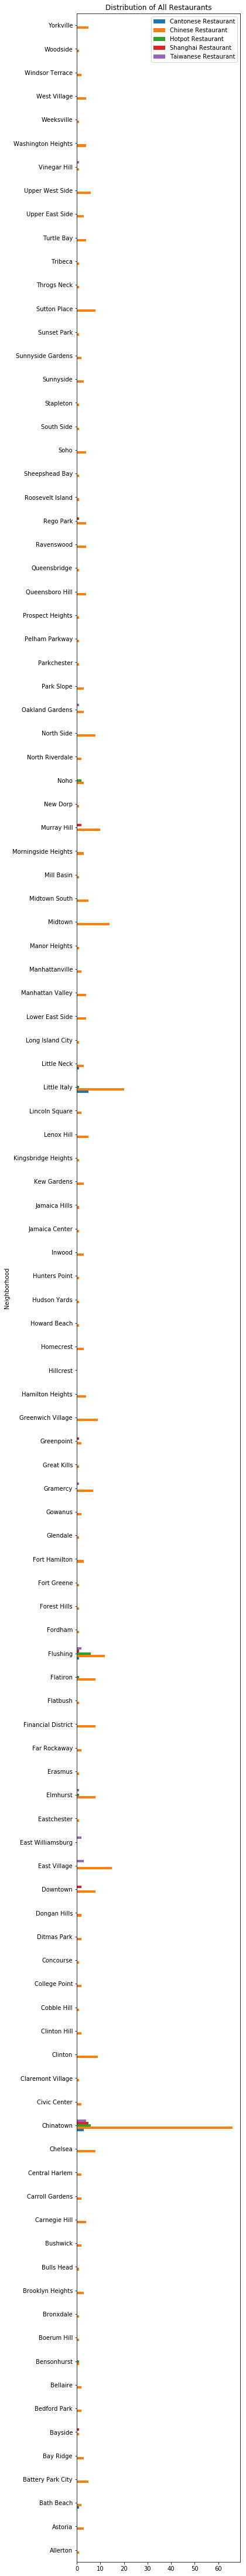

In [125]:
temp1 = CN_restaurants_grouped[['Neighborhood',
                                'Cantonese Restaurant',
                                'Chinese Restaurant',
                                'Hotpot Restaurant',
                                'Shanghai Restaurant',
                                'Taiwanese Restaurant']]                                                                                                                                 
temp1.set_index('Neighborhood',inplace=True)
ax_all = temp1.plot(kind='barh',
                    figsize=(5,80))
ax_all.set_title("Distribution of All Restaurants")
plt.show()

From Distribution of All Restaurants Figure, we know ChinaTown and Flushing have all kinds of the category of Chinese food.
And Chinese restaurant is the most common restaurant in NYC.

### 3.5 Using K-Means to Cluster all kinds of Restaurants

#### Preparing for the data

In [126]:
CN_restaurants_onehot.head()

,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Dim Sum Restaurant,Hotpot Restaurant,Peking Duck Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Neighborhood,Venue Id,Rating,Price,Likes,Photos,Tips
0,0,0,1,0,0,0,0,0,0,Eastchester,4dabc3dc93a04642f09ccabd,7.0,1.0,6,0,0
1,0,0,1,0,0,0,0,0,0,Pelham Parkway,4b9d6b45f964a52078ab36e3,7.7,1.0,9,11,10
2,0,0,1,0,0,0,0,0,0,Bedford Park,4e4d0387bd413c4cc66dfd72,6.0,1.0,5,1,2
3,0,0,1,0,0,0,0,0,0,Bedford Park,4e2e08021838f1c552b6b8eb,6.3,1.0,6,4,8
4,0,0,1,0,0,0,0,0,0,Fordham,566f33e7498e44c2501bda81,7.6,1.0,12,14,2


From the **correlation coefficient Matrix**, we know **Likes,Photos,Tips** have a strong relation, so I **select** ***Likes*** as the feature and **drop** ***Photos,Tips***.

In [127]:
restaurants_clustering = CN_restaurants_onehot.drop(['Venue Id','Neighborhood','Photos','Tips'],1)
restaurants_clustering.head()

,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Dim Sum Restaurant,Hotpot Restaurant,Peking Duck Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Rating,Price,Likes
0,0,0,1,0,0,0,0,0,0,7.0,1.0,6
1,0,0,1,0,0,0,0,0,0,7.7,1.0,9
2,0,0,1,0,0,0,0,0,0,6.0,1.0,5
3,0,0,1,0,0,0,0,0,0,6.3,1.0,6
4,0,0,1,0,0,0,0,0,0,7.6,1.0,12


#### Determine the optimal number of clusters for k-means clustering by The Elbow Method

**The Elbow Method** - calculate the sum of squared distances of samples to their closest cluster center for different values of k. The value of k after which there is no siginificant decrease in sum of squared distances is choosen.

In [128]:
from sklearn.datasets import make_blobs
!conda install -c districtdatalabs yellowbrick
from yellowbrick.cluster import KElbowVisualizer

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    yellowbrick-1.1            |           py36_0         276 KB  districtdatalabs
    pytest-runner-5.2          |             py_0          13 KB
    ------------------------------------------------------------
                                           Total:         289 KB

The following NEW packages will be INSTALLED:

    pytest-runner: 5.2-py_0                   
    yellowbrick:   1.1-py36_0 districtdatalabs


yellowbrick-1.1      | 276 KB    | ##################################### | 100% 
pytest-runner-5.2    | 13 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


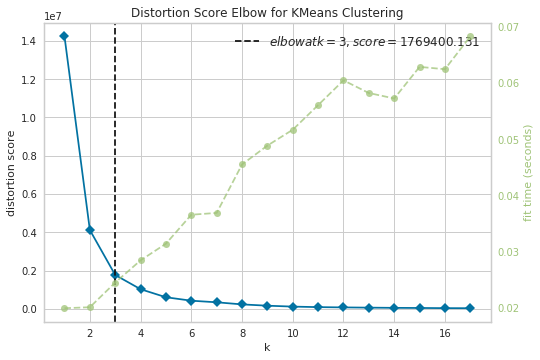

In [129]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,18))
visualizer.fit(restaurants_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

So, as shown in the figure, we pick k = 3

In [130]:
# set number of clusters
kclusters = 3
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters,random_state=0).fit(restaurants_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [131]:
CN_restaurants_onehot.insert(0, 'Cluster Labels', kmeans.labels_)
CN_restaurants_onehot.head(10)

,Cluster Labels,Cantonese Restaurant,Cha Chaan Teng,Chinese Restaurant,Dim Sum Restaurant,Hotpot Restaurant,Peking Duck Restaurant,Shanghai Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Neighborhood,Venue Id,Rating,Price,Likes,Photos,Tips
0,0,0,0,1,0,0,0,0,0,0,Eastchester,4dabc3dc93a04642f09ccabd,7.0,1.0,6,0,0
1,0,0,0,1,0,0,0,0,0,0,Pelham Parkway,4b9d6b45f964a52078ab36e3,7.7,1.0,9,11,10
2,0,0,0,1,0,0,0,0,0,0,Bedford Park,4e4d0387bd413c4cc66dfd72,6.0,1.0,5,1,2
3,0,0,0,1,0,0,0,0,0,0,Bedford Park,4e2e08021838f1c552b6b8eb,6.3,1.0,6,4,8
4,0,0,0,1,0,0,0,0,0,0,Fordham,566f33e7498e44c2501bda81,7.6,1.0,12,14,2
5,0,0,0,1,0,0,0,0,0,0,Throgs Neck,4bbe0e0407809521db5bdb91,7.6,2.0,10,16,7
6,0,0,0,1,0,0,0,0,0,0,Parkchester,4b89b62df964a520ff4c32e3,7.0,2.0,5,12,8
7,0,0,0,1,0,0,0,0,0,0,North Riverdale,4c28cca7ed0ac9b6b2c160aa,6.5,1.0,2,3,4
8,0,0,0,1,0,0,0,0,0,0,North Riverdale,4ca4fda4d971b1f77da5f2e0,5.7,1.0,4,1,1
9,0,0,0,1,0,0,0,0,0,0,Concourse,4d9a695ee5fd6ea8e3096df5,7.4,1.0,5,0,2


In [132]:
temp = CN_restaurants_onehot[['Cluster Labels','Venue Id']]
temp.shape

(514, 2)

In [133]:
from collections import Counter # count occurrences 
print(len(kmeans.labels_))
print(Counter(kmeans.labels_))

514
Counter({0: 462, 2: 41, 1: 11})


In [134]:
restaurants_infos = pd.merge(CN_restaurants_data,temp,how='left',left_on='Venue Id',right_on='Venue Id')
restaurants_infos.head()

,Venue Id,Rating,Price,Likes,Photos,Tips,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels
0,4dabc3dc93a04642f09ccabd,7.0,1.0,6,0,0,Bronx,Eastchester,40.887556,-73.827806,Xing Lung Chinese Restaurant,40.888785,-73.831226,Chinese Restaurant,0
1,4b9d6b45f964a52078ab36e3,7.7,1.0,9,11,10,Bronx,Pelham Parkway,40.857413,-73.854756,Mr. Q's Chinese Restaurant,40.855790,-73.855455,Chinese Restaurant,0
2,4e4d0387bd413c4cc66dfd72,6.0,1.0,5,1,2,Bronx,Bedford Park,40.870185,-73.885512,Hung Hing Chinese Restaurant,40.871181,-73.886759,Chinese Restaurant,0
3,4e2e08021838f1c552b6b8eb,6.3,1.0,6,4,8,Bronx,Bedford Park,40.870185,-73.885512,Choi Yuan - Chinese Restaurant,40.873078,-73.889086,Chinese Restaurant,0
4,566f33e7498e44c2501bda81,7.6,1.0,12,14,2,Bronx,Fordham,40.860997,-73.896427,Panda Express,40.863001,-73.900894,Chinese Restaurant,0


In [135]:
restaurants_infos.shape

(514, 15)

In [136]:
print("CN_restaurants_onehot:",CN_restaurants_onehot.shape)
print("CN_restaurants_data:",CN_restaurants_data.shape)
print("restaurants_infos:",restaurants_infos.shape)

CN_restaurants_onehot: (514, 17)
CN_restaurants_data: (514, 14)
restaurants_infos: (514, 15)


In [137]:
# Store the data
restaurants_infos.to_excel('restaurants_infos.xls')

#### visualizing the map

In [138]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, neib,category,name,cluster in zip(restaurants_infos['Venue Latitude'], restaurants_infos['Venue Longitude'], restaurants_infos['Neighborhood'],restaurants_infos['Venue Category'],restaurants_infos['Venue'],restaurants_infos['Cluster Labels']):
    #print (poi, cluster)
    label = folium.Popup('Neighborhood: '+str(neib)+' Category: '+str(category) + ' Name: '+str(name) +' Cluster: ' + str(cluster), parse_html=True)   
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

    

### 4. Let's Examine the Cluster Result and give each label a Name

#### Cluster 1

In [139]:
cluster1 = restaurants_infos.loc[restaurants_infos['Cluster Labels']==0,['Borough','Neighborhood','Venue','Venue Category',
                                                                         'Rating','Price','Likes','Photos','Tips','Cluster Labels']]
cluster1

,Borough,Neighborhood,Venue,Venue Category,Rating,Price,Likes,Photos,Tips,Cluster Labels
0,Bronx,Eastchester,Xing Lung Chinese Restaurant,Chinese Restaurant,7.0,1.0,6,0,0,0
1,Bronx,Pelham Parkway,Mr. Q's Chinese Restaurant,Chinese Restaurant,7.7,1.0,9,11,10,0
2,Bronx,Bedford Park,Hung Hing Chinese Restaurant,Chinese Restaurant,6.0,1.0,5,1,2,0
3,Bronx,Bedford Park,Choi Yuan - Chinese Restaurant,Chinese Restaurant,6.3,1.0,6,4,8,0
4,Bronx,Fordham,Panda Express,Chinese Restaurant,7.6,1.0,12,14,2,0
5,Bronx,Throgs Neck,Green Dragon,Chinese Restaurant,7.6,2.0,10,16,7,0
6,Bronx,Parkchester,Sabor Latino Seafood Restaurant,Chinese Restaurant,7.0,2.0,5,12,8,0
7,Bronx,North Riverdale,New China,Chinese Restaurant,6.5,1.0,2,3,4,0
8,Bronx,North Riverdale,Golden Phoenix Chinese Restaurant,Chinese Restaurant,5.7,1.0,4,1,1,0
9,Bronx,Concourse,Lucky House Chinese Restaurant,Chinese Restaurant,7.4,1.0,5,0,2,0


In [159]:
cluster1.groupby(by='Neighborhood').count().reset_index()[['Neighborhood','Venue']].rename(columns={'Venue':'Counts'}).sort_values(by='Counts',ascending=False)

,Neighborhood,Counts
18,Chinatown,70
62,Little Italy,29
38,Flushing,23
29,East Village,18
69,Midtown,17
73,Murray Hill,10
32,Elmhurst,10
28,Downtown,9
45,Gramercy,9
95,Sutton Place,9


In [144]:
cluster1[['Rating','Price','Likes']].mean()

Rating     6.754762
Price      1.387446
Likes     28.640693
dtype: float64

**Cluster1** is the cluster of very ordinary Chinese restaurants which Rating, Price and Likes are not high 

#### Cluster 2

In [140]:
cluster2 = restaurants_infos.loc[restaurants_infos['Cluster Labels']==1,['Borough','Neighborhood','Venue','Venue Category',
                                                                         'Rating','Price','Likes','Photos','Tips','Cluster Labels']]
cluster2

,Borough,Neighborhood,Venue,Venue Category,Rating,Price,Likes,Photos,Tips,Cluster Labels
81,Manhattan,Chinatown,Jing Fong Restaurant 金豐大酒樓,Dim Sum Restaurant,7.9,2.0,1000,1635,290,1
87,Manhattan,Chinatown,Nom Wah Tea Parlor,Dim Sum Restaurant,8.5,1.0,1256,1446,375,1
91,Manhattan,Chinatown,Shanghai 21,Shanghai Restaurant,8.9,2.0,744,663,263,1
100,Manhattan,Chinatown,Vanessa's Dumpling House,Chinese Restaurant,8.4,1.0,1185,688,415,1
102,Manhattan,Chinatown,Shanghai Café Deluxe,Chinese Restaurant,7.9,1.0,895,859,369,1
103,Manhattan,Chinatown,Golden Unicorn Restaurant 麒麟金閣,Dim Sum Restaurant,7.9,2.0,810,1042,228,1
109,Manhattan,Chinatown,Mission Chinese Food,Chinese Restaurant,8.2,3.0,945,1091,406,1
240,Manhattan,Murray Hill,Café China,Chinese Restaurant,8.8,2.0,1046,568,273,1
250,Manhattan,Chelsea,Buddakan,Chinese Restaurant,9.0,3.0,1486,1718,521,1
321,Manhattan,Soho,Macao Trading Co.,Chinese Restaurant,8.7,3.0,740,595,229,1


In [152]:
cluster2.groupby(by='Neighborhood').count().reset_index()[['Neighborhood','Venue']].rename(columns={'Venue':'Counts'})

,Neighborhood,Counts
0,Chelsea,1
1,Chinatown,7
2,Murray Hill,1
3,Soho,1
4,West Village,1


In [153]:
cluster2[['Neighborhood','Price','Likes']].mean()

Price      2.090909
Likes    983.454545
dtype: float64

**cluster 2** is the cluster of high-end Chinese restaurants which Rating, Price, Likes are high.

#### Cluster 3

In [141]:
cluster3 = restaurants_infos.loc[restaurants_infos['Cluster Labels']==2,['Borough','Neighborhood','Venue','Venue Category',
                                                                         'Rating','Price','Likes','Photos','Tips','Cluster Labels']]
cluster3

,Borough,Neighborhood,Venue,Venue Category,Rating,Price,Likes,Photos,Tips,Cluster Labels
49,Brooklyn,Downtown,Yaso Tangbao,Shanghai Restaurant,7.2,2.0,222,160,69,2
57,Brooklyn,East Williamsburg,Win Son,Taiwanese Restaurant,9.1,2.0,436,262,101,2
59,Brooklyn,North Side,Birds of a Feather,Chinese Restaurant,9.0,1.0,344,189,72,2
60,Brooklyn,North Side,M Shanghai Bistro,Chinese Restaurant,7.7,2.0,230,122,129,2
61,Brooklyn,North Side,Vanessa's Dumpling House,Chinese Restaurant,8.1,1.0,516,248,144,2
72,Manhattan,Chinatown,Spicy Village,Chinese Restaurant,8.8,1.0,501,282,179,2
73,Manhattan,Chinatown,Wah Fung Number 1 Fast Food 華豐快餐店,Chinese Restaurant,8.5,1.0,194,194,96,2
80,Manhattan,Chinatown,Great N.Y. Noodletown,Chinese Restaurant,8.0,1.0,547,769,288,2
82,Manhattan,Chinatown,Taiwan Pork Chop House 臺灣武昌好味道,Taiwanese Restaurant,8.4,1.0,226,329,84,2
85,Manhattan,Chinatown,99 Favor Taste 99號餐廳,Hotpot Restaurant,7.9,2.0,466,412,102,2


In [155]:
cluster3.groupby(by='Neighborhood').count().reset_index()[['Neighborhood','Venue']].rename(columns={'Venue':'Counts'})

,Neighborhood,Counts
0,Chelsea,2
1,Chinatown,23
2,Clinton,1
3,Downtown,1
4,East Village,2
5,East Williamsburg,1
6,Flatiron,1
7,Flushing,3
8,Murray Hill,1
9,North Side,3


In [146]:
cluster3[['Rating','Price','Likes']].mean()

Rating      8.185366
Price       1.609756
Likes     316.731707
dtype: float64

**Cluster 3** is cluster of Chinese restaurants with high cost performance. They have high Rating and Likes but with a low price